### Quantum Battery project

Step 1. Run below cell to import all package.

In [4]:
from qsee.compilation.qcompilation import QuantumCompilation
from qsee.compilation.qsp import QuantumStatePreparation
from qsee.core import ansatz, state, gradient, optimizer
from qsee.backend import constant, utilities
import matplotlib.pyplot as plt
import base.object
import base.circuit
import numpy as np, qiskit
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Step 2. Run below cell to make sure that your environment is ok or not

In [5]:
qsp = QuantumStatePreparation.prepare([1, 0, 0, 0])

Step 3. Coding!!!

Thetas: [ 1.00000000e+00  1.00000000e+00 -1.50280642e-05 -1.50280642e-05
  1.00000000e+00  9.99999999e-01]


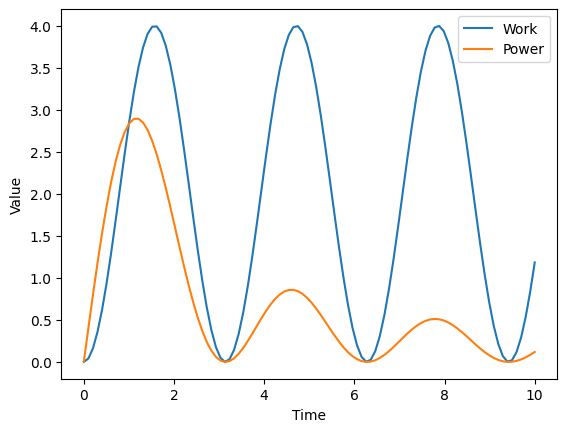

In [6]:

def test(num_qubits, t1,thetas,shots):
    """
        Return array time , W , P

        INPUT:
          t: time
          thetas: array parameter (length 2*(N-1))
          shots: number of measurement times

    """
    time=np.linspace(0,t1,shots)
    arrayW=[]
    arrayP=[]

    for i in time:
        w = base.object.W(num_qubits, i,thetas)
        p = base.object.P(num_qubits, i,thetas)
        arrayW.append(w)
        arrayP.append(p)

    return time,arrayW,arrayP

t = 10
num_qubits = 2
thetas = np.zeros(2*(num_qubits-1))
circuit,ttas=base.circuit.aqc(num_qubits,t,thetas)
print("Thetas:",ttas)
# Calculate W(t) and P(t) by measurement (measure many times) or theory (caculate vector @ matrix @ vector).
ltime, arrayW, arrayP = test(num_qubits, t, ttas, 100)



plt.plot(ltime, arrayW, label="Work")
plt.plot(ltime, arrayP, label="Power")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()